In [1]:
%store -r __imp

In [2]:
__imp
%run downcast.py

Tickle


In [14]:
train= pd.read_csv( 'train.csv')
test= pd.read_csv( 'test.csv')
new= pd.read_csv( 'new_merchant_transactions.csv')
his= pd.read_csv( 'historical_transactions.csv')
mer= pd.read_csv( 'merchants.csv')
pd.options.display.max_rows= 1000
pd.options.display.max_columns= 100

In [ ]:
train= downcast( train)
test= downcast( test)
new= downcast( new)
his= downcast( his)
#mer= downcast( mer) has NA values

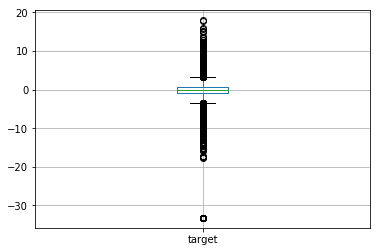

In [4]:
train.boxplot(column=['target'],return_type='axes')

In [5]:
train[ train.target== -33].count()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [9]:
train.target.min(), train.target.max()

(-33.21928095, 17.9650684)

In [ ]:
train.hist( column='')

In [10]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

In [11]:
train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


In [12]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [23]:
train.first_active_month= pd.to_datetime( train.first_active_month)
test.first_active_month= pd.to_datetime( test.first_active_month)

In [20]:
mer.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [18]:
mer.most_recent_sales_range.unique()

array(['E', 'C', 'D', 'A', 'B'], dtype=object)

In [21]:
new.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


In [22]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


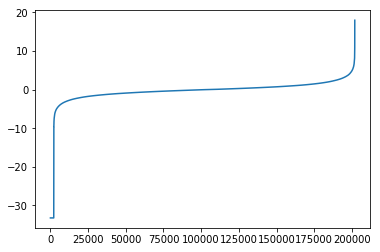

In [26]:
plt.plot( range( train.shape[0]), np.sort(train.target))

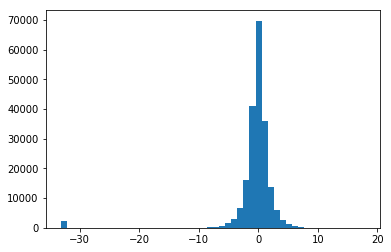

In [28]:
plt.hist( train.target, bins= 50);

In [30]:
(train.target<-20).sum()

2207

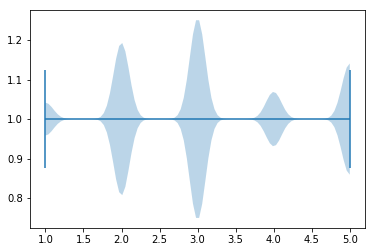

In [35]:
plt.violinplot( train.feature_1, vert= False);

In [37]:
his_gp= his.groupby('card_id').purchase_amount.size().reset_index()
his_gp.columns= ['card_id','num_his_trans']
train= pd.merge( train, his_gp, on= 'card_id', how= 'left')
test= pd.merge( test, his_gp, on= 'card_id', how= 'left')

In [64]:
b= train.groupby('num_his_trans').target.mean()
#b

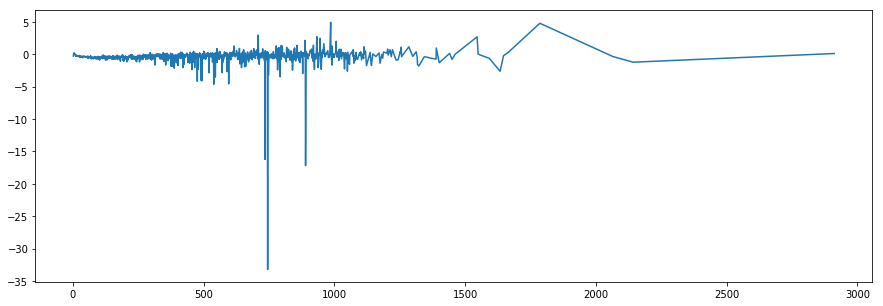

In [46]:
plt.figure( figsize=[15,5])
plt.plot( b.index[::-1], b.values[::-1])

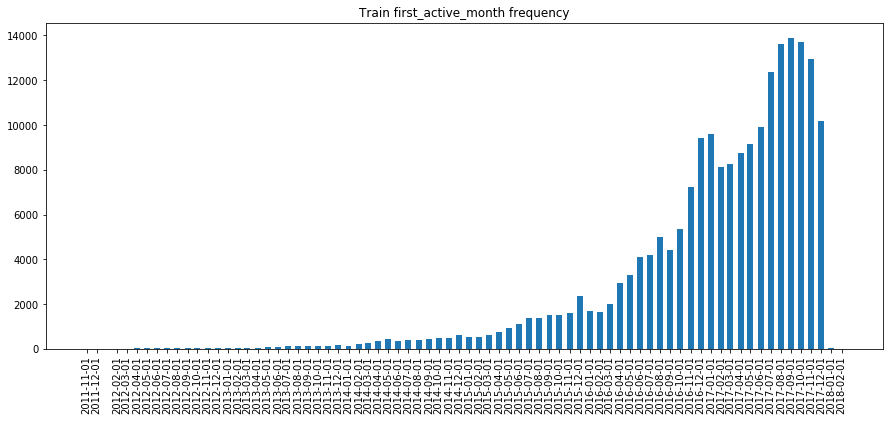

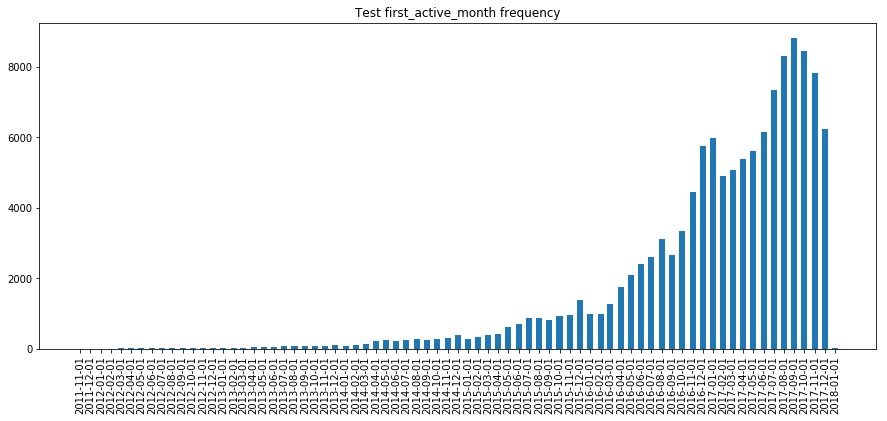

In [6]:
act_gp= train.first_active_month.dt.date.value_counts()
act_gp= act_gp.sort_index()
plt.figure( figsize= [15,6])
plt.bar( act_gp.index, act_gp.values, tick_label= act_gp.index, width= 18)
plt.xticks(rotation='vertical');
plt.title('Train first_active_month frequency')
plt.show()
act_gp= test.first_active_month.dt.date.value_counts()
act_gp= act_gp.sort_index()
plt.figure( figsize= [15,6])
plt.bar( act_gp.index, act_gp.values, tick_label= act_gp.index, width= 18)
plt.xticks(rotation='vertical');
plt.title('Test first_active_month frequency')
plt.show()

In [63]:
pd.cut?

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
train['num_trans_binned']= pd.cut( train.groupby('purchase_amount').size(),
                                  bins)


In [66]:
his.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [67]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'num_his_trans'],
      dtype='object')

In [77]:
his[ his.card_id=='C_ID_4e6213e9bc'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
24,Y,C_ID_4e6213e9bc,3,N,0,A,511,M_ID_79db784180,-13,0,2017-01-20 09:16:43,1.0,16,7
55,Y,C_ID_4e6213e9bc,3,N,0,A,332,M_ID_13aa6b335f,-13,0,2017-01-20 10:12:39,1.0,16,2
308,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-12,0,2017-02-07 07:34:20,1.0,16,37
128,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-12,0,2017-02-07 13:01:28,1.0,16,37
181,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-12,0,2017-02-07 22:06:00,1.0,16,16
57,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-12,0,2017-02-14 12:54:39,1.0,16,37
114,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-12,0,2017-02-15 09:36:59,1.0,16,37
146,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-12,0,2017-02-15 12:53:48,1.0,16,37
355,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-12,0,2017-02-21 10:03:11,1.0,16,34
144,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-11,0,2017-03-03 15:41:26,1.0,16,37


In [73]:
his.shape, (his.card_id=='C_ID_4e6213e9bc').sum()

((29112361, 14), 400)

In [76]:
test[test.card_id=='C_ID_4e6213e9bc']

,first_active_month,card_id,feature_1,feature_2,feature_3,num_his_trans
7134,2016-06-01,C_ID_4e6213e9bc,3,3,1,400


In [78]:
mer.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [79]:
his[ his.card_id=='C_ID_4e6213e9bc'].sort_values('purchase_date').merchant_id.value_counts()

M_ID_e020e9b302    75
M_ID_21e1552dab    50
M_ID_e6d5ae8ea6    42
M_ID_1449f22bfb    25
M_ID_5e8220e564    21
M_ID_e8fb39882d    18
M_ID_979ed661fc    17
M_ID_86ec983688    17
M_ID_00a6ca8a8a    12
M_ID_50af771f8d     9
M_ID_001d92b649     8
M_ID_0e3d16d4cc     7
M_ID_c2a7f2dccf     6
M_ID_28a12189ea     6
M_ID_dc7356f06d     5
M_ID_22c9cfa265     5
M_ID_97e86eae5f     5
M_ID_e52dafd130     4
M_ID_50f575c681     4
M_ID_83367527c8     3
M_ID_74ba14b5fc     3
M_ID_e8062abeef     3
M_ID_98b342c0e3     3
M_ID_2ef6ccb60a     3
M_ID_9d41786a50     3
M_ID_11cf1b606a     3
M_ID_79db784180     2
M_ID_980d5f51ae     2
M_ID_7329fe90b9     2
M_ID_5d3f4fb238     2
M_ID_9ea82613f5     2
M_ID_e68ba142de     2
M_ID_6cb0602e94     2
M_ID_c2ae34c2ef     2
M_ID_7c5e93af2f     1
M_ID_f23ff77f24     1
M_ID_dfdf05b37b     1
M_ID_b9c0b8171f     1
M_ID_8ae0e078d3     1
M_ID_89c56116e9     1
M_ID_573d9326ad     1
M_ID_8402682d1b     1
M_ID_a12e82f450     1
M_ID_3b3584964b     1
M_ID_4856894248     1
M_ID_4524a

In [81]:
(his[ his.card_id=='C_ID_4e6213e9bc'].purchase_amount != 0).sum()

0

In [83]:
train[ train.target > 5]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_his_trans
188,2017-04-01,C_ID_8fc73d1ef2,2,2,0,5.265625,4
322,2017-11-01,C_ID_0dea332d6c,3,3,1,8.617188,5
327,2017-06-01,C_ID_cb946c96eb,4,1,0,5.695312,83
549,2017-11-01,C_ID_856221c39e,3,1,1,5.281250,16
607,2017-12-01,C_ID_12ce7cf5bc,3,1,1,6.148438,10
768,2015-06-01,C_ID_2fa52141dc,3,3,1,7.078125,105
1028,2015-12-01,C_ID_ddc523a16c,3,3,1,5.316406,116
1074,2017-02-01,C_ID_195e486a73,3,2,1,6.554688,10
1094,2017-08-01,C_ID_d2df3c5c60,1,3,0,7.207031,22
1114,2016-11-01,C_ID_bcfdafdb04,4,2,0,5.750000,24


In [84]:
his[ his.card_id=='C_ID_0dea332d6c'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
24861278,Y,C_ID_0dea332d6c,-1,Y,2,C,489,M_ID_b6cf07db10,-3,0,2017-11-24 15:14:12,NaN,-1,16
24861277,N,C_ID_0dea332d6c,-1,Y,4,C,879,M_ID_9139332ccc,-2,0,2017-12-04 11:46:05,NaN,-1,29
24861276,Y,C_ID_0dea332d6c,-1,Y,2,C,489,M_ID_b6cf07db10,-2,0,2017-12-15 09:38:28,NaN,-1,16
24861275,Y,C_ID_0dea332d6c,-1,Y,2,C,489,M_ID_b6cf07db10,-1,0,2018-01-19 11:13:03,NaN,-1,16
24861274,Y,C_ID_0dea332d6c,-1,Y,2,C,489,M_ID_b6cf07db10,0,0,2018-02-28 23:21:54,NaN,-1,16


In [90]:
new[ new.card_id=='C_ID_0dea332d6c'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1777519,Y,C_ID_0dea332d6c,322,N,1,B,511,NaN,2,-0.744141,2018-04-27 09:19:00,3.0,11,7


In [87]:
mer[ (mer.merchant_id== 'M_ID_b6cf07db10') | (mer.merchant_id=='M_ID_9139332ccc')]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
333708,M_ID_b6cf07db10,19096,489,16,-0.057465,-0.057465,Y,A,C,1.10,1.072423,3,1.02,1.038487,6,0.94,0.928347,12,Y,-1,-1,NaN
334694,M_ID_9139332ccc,35,511,7,-0.057465,-0.057465,Y,A,A,0.94,0.919558,3,0.82,0.783000,6,0.65,0.584000,12,Y,-1,-1,NaN


In [88]:
his[ his.card_id=='C_ID_fc811fa46f'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
22358968,Y,C_ID_fc811fa46f,17,N,0,A,307,M_ID_34eb222ad2,-10,0,2017-03-15 09:40:04,4.0,22,19
22358972,Y,C_ID_fc811fa46f,17,N,0,A,307,M_ID_34eb222ad2,-10,0,2017-03-23 09:34:57,4.0,22,19
22358975,Y,C_ID_fc811fa46f,17,N,0,A,307,M_ID_031cd36b40,-10,0,2017-03-31 12:26:50,4.0,22,19
22358973,Y,C_ID_fc811fa46f,17,N,0,A,454,M_ID_32534b4938,-9,0,2017-04-13 13:37:56,4.0,22,39
22358979,Y,C_ID_fc811fa46f,17,N,0,A,80,M_ID_40e0130f8d,-8,0,2017-05-05 21:29:14,4.0,22,37
22358969,Y,C_ID_fc811fa46f,17,N,0,A,80,M_ID_26d4fadb60,-8,0,2017-05-06 20:48:22,4.0,22,37
22358970,Y,C_ID_fc811fa46f,17,N,0,A,307,M_ID_34eb222ad2,-8,0,2017-05-08 06:29:39,4.0,22,19
22358977,Y,C_ID_fc811fa46f,17,N,0,A,705,M_ID_8430737407,-8,0,2017-05-11 12:37:46,4.0,22,33
22358976,Y,C_ID_fc811fa46f,17,N,0,A,307,M_ID_b54d454927,-7,0,2017-06-14 18:36:31,4.0,22,19
22358980,Y,C_ID_fc811fa46f,17,N,0,A,454,M_ID_32534b4938,-5,0,2017-08-30 14:15:05,4.0,22,39


In [89]:
new[ new.card_id=='C_ID_fc811fa46f'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1962877,Y,C_ID_fc811fa46f,69,N,1,B,879,M_ID_00a6ca8a8a,2,-0.745605,2018-03-15 18:43:49,1.0,9,29


In [92]:
his[ his.card_id=='C_ID_700c15a07d'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
22235877,Y,C_ID_700c15a07d,117,N,0,A,80,M_ID_cbf911cbb0,-9,0,2017-05-13 16:34:27,4.0,13,37
22235926,Y,C_ID_700c15a07d,117,N,0,A,80,M_ID_cbf911cbb0,-9,0,2017-05-13 17:38:24,4.0,13,37
22235880,N,C_ID_700c15a07d,-1,Y,1,B,661,M_ID_fc7d7969c3,-9,0,2017-05-13 21:13:13,NaN,-1,8
22235922,N,C_ID_700c15a07d,-1,Y,1,B,661,M_ID_fc7d7969c3,-9,0,2017-05-13 21:20:02,NaN,-1,8
22235903,N,C_ID_700c15a07d,-1,Y,1,B,661,M_ID_fc7d7969c3,-9,0,2017-05-13 21:21:04,NaN,-1,8
22235871,N,C_ID_700c15a07d,-1,Y,2,C,879,M_ID_9139332ccc,-9,0,2017-05-23 16:19:54,NaN,-1,29
22235873,Y,C_ID_700c15a07d,117,N,0,A,560,M_ID_a831b0cc7e,-9,0,2017-05-27 13:44:41,4.0,13,34
22235907,N,C_ID_700c15a07d,-1,Y,3,C,607,M_ID_8452f82173,-7,0,2017-07-09 18:40:24,NaN,-1,29
22235928,N,C_ID_700c15a07d,-1,Y,3,C,607,M_ID_8452f82173,-7,0,2017-07-10 20:37:30,NaN,-1,29
22235864,N,C_ID_700c15a07d,-1,Y,3,C,607,M_ID_8452f82173,-7,0,2017-07-10 20:39:04,NaN,-1,29


In [91]:
new[ new.card_id=='C_ID_700c15a07d'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id


In [93]:
train[ train.target < -5]

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_his_trans
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.218750,77
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.218750,38
98,2014-08-01,C_ID_26364d47bb,3,3,1,-5.289062,12
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.218750,62
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.218750,183
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.218750,56
248,2015-07-01,C_ID_c4262c902e,5,1,1,-33.218750,24
254,2017-03-01,C_ID_6a2c823e5f,2,1,0,-33.218750,22
269,2016-07-01,C_ID_671bb26007,2,2,0,-6.601562,239
306,2016-07-01,C_ID_42421ac52e,5,2,1,-7.433594,135


In [94]:
his[ his.card_id=='C_ID_42421ac52e'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
25960148,Y,C_ID_42421ac52e,104,N,0,A,705,M_ID_b95e8e7123,-13,0,2017-01-22 12:53:40,1.0,16,33
25960150,Y,C_ID_42421ac52e,104,N,0,A,690,M_ID_10e4a1af78,-11,0,2017-03-11 14:32:01,1.0,16,1
25960111,Y,C_ID_42421ac52e,331,N,0,A,307,M_ID_7997cbb408,-11,0,2017-03-12 11:58:17,1.0,16,19
25960110,Y,C_ID_42421ac52e,104,N,0,A,307,M_ID_82f75a3429,-11,0,2017-03-12 14:33:40,1.0,16,19
25960055,Y,C_ID_42421ac52e,104,N,0,A,411,M_ID_c26ac9a12f,-11,0,2017-03-28 13:14:25,1.0,16,21
25960078,N,C_ID_42421ac52e,104,N,0,A,307,M_ID_82f75a3429,-11,0,2017-03-28 21:41:12,1.0,16,19
25960077,Y,C_ID_42421ac52e,104,N,0,A,307,M_ID_82f75a3429,-11,0,2017-03-28 21:41:33,1.0,16,19
25960138,Y,C_ID_42421ac52e,104,N,0,A,356,M_ID_c26ac9a12f,-10,0,2017-04-05 15:45:05,1.0,16,21
25960068,Y,C_ID_42421ac52e,104,N,0,A,818,M_ID_1037b30551,-10,0,2017-04-06 00:26:53,1.0,16,12
25960124,Y,C_ID_42421ac52e,104,N,0,A,367,M_ID_00ad2b9f6f,-10,0,2017-04-11 23:40:23,1.0,16,16


In [95]:
new[ new.card_id=='C_ID_42421ac52e'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1526109,Y,C_ID_42421ac52e,104,N,0,A,309,M_ID_b28acec660,1,-0.673340,2018-03-07 09:29:03,1.0,16,21
1526108,Y,C_ID_42421ac52e,104,N,0,A,80,M_ID_5211f8d0ca,2,-0.731934,2018-04-04 16:46:33,1.0,16,37


In [113]:
his[ his.card_id=='C_ID_67a5878b7c'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
23516969,Y,C_ID_67a5878b7c,69,N,1,B,130,M_ID_c355870ab2,-11,0,2017-03-02 15:00:50,1.0,9,41
23517062,Y,C_ID_67a5878b7c,69,N,2,C,472,M_ID_f62f5d4f6b,-11,0,2017-03-02 15:54:06,1.0,9,4
23517089,Y,C_ID_67a5878b7c,69,N,1,B,276,M_ID_de54dcf09d,-11,0,2017-03-02 16:05:03,1.0,9,27
23516996,Y,C_ID_67a5878b7c,69,N,1,B,683,M_ID_2637773dd2,-11,0,2017-03-06 15:03:34,1.0,9,34
23517150,Y,C_ID_67a5878b7c,69,N,1,B,443,M_ID_7306a369ea,-11,0,2017-03-07 14:40:57,1.0,9,21
23517113,Y,C_ID_67a5878b7c,69,N,2,C,529,M_ID_2a86824c3d,-11,0,2017-03-07 15:04:39,1.0,9,20
23516971,Y,C_ID_67a5878b7c,69,N,1,B,278,M_ID_6052e557b9,-11,0,2017-03-07 16:00:48,1.0,9,37
23517007,Y,C_ID_67a5878b7c,69,N,1,B,705,M_ID_c9cc03462e,-11,0,2017-03-10 20:05:32,1.0,9,33
23517000,N,C_ID_67a5878b7c,69,N,1,B,80,M_ID_eced0f8a81,-11,0,2017-03-13 15:38:46,1.0,9,37
23517093,Y,C_ID_67a5878b7c,69,N,1,B,80,M_ID_eced0f8a81,-11,0,2017-03-13 15:39:06,1.0,9,37


In [114]:
new[ new.card_id=='C_ID_67a5878b7c'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
76244,Y,C_ID_67a5878b7c,69,N,1,B,561,M_ID_50f575c681,1,-0.687012,2018-03-07 16:23:38,1.0,9,7
76246,Y,C_ID_67a5878b7c,158,N,1,B,839,M_ID_50076f761c,1,-0.526367,2018-03-09 10:44:35,1.0,15,29
76230,Y,C_ID_67a5878b7c,69,N,6,C,210,M_ID_d2210e6c65,1,38.093750,2018-03-09 14:56:35,1.0,9,35
76225,Y,C_ID_67a5878b7c,69,N,1,B,278,M_ID_18e244417e,1,-0.626465,2018-03-10 22:04:32,1.0,9,37
76229,Y,C_ID_67a5878b7c,69,N,1,B,278,M_ID_e5a9d5c08d,1,-0.694824,2018-03-14 12:07:17,1.0,9,37
76236,Y,C_ID_67a5878b7c,69,N,1,B,87,M_ID_c700c6f928,1,-0.687012,2018-03-14 12:31:42,1.0,9,27
76245,Y,C_ID_67a5878b7c,299,N,2,C,544,M_ID_cdba603e7c,1,-0.539551,2018-03-16 11:12:55,1.0,9,29
76240,Y,C_ID_67a5878b7c,69,N,3,C,367,M_ID_881627f8be,1,-0.613770,2018-03-16 11:19:59,1.0,9,16
76227,Y,C_ID_67a5878b7c,21,N,1,B,278,M_ID_6f939b9049,1,-0.654297,2018-03-18 11:14:13,1.0,9,37
76235,Y,C_ID_67a5878b7c,-1,Y,2,C,813,M_ID_7b905120a5,1,-0.423340,2018-03-19 09:57:11,NaN,-1,29


In [98]:
his.category_2.unique()

array([ 1., nan,  3.,  5.,  2.,  4.])

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


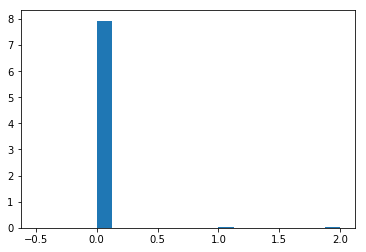

In [102]:
plt.hist( his.purchase_amount, bins=20, range= [-.5,2], normed=True);

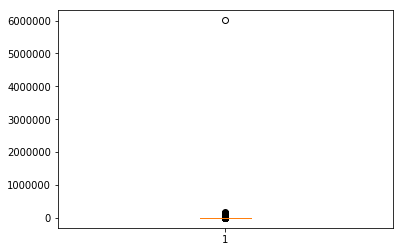

In [106]:
plt.boxplot(his.purchase_amount);

In [107]:
his.purchase_amount.describe()

count    2.911236e+07
mean     6.445235e-01
std      1.123521e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.010603e+06
Name: purchase_amount, dtype: float64

In [108]:
new.purchase_amount.describe()

count    1.963031e+06
mean              NaN
std               NaN
min     -7.470703e-01
25%     -7.167969e-01
50%     -6.748047e-01
75%     -5.815430e-01
max      2.632500e+02
Name: purchase_amount, dtype: float64

In [112]:
new[new.purchase_amount>10]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
2388,Y,C_ID_f7bc4176d7,-1,Y,10,C,245,M_ID_9f227ee53d,2,16.875000,2018-01-14 22:49:19,NaN,-1,3
10653,Y,C_ID_6a15b61b4a,88,N,10,C,836,M_ID_29bd675fd8,2,14.281250,2018-04-27 16:35:26,1.0,16,5
10865,Y,C_ID_10543d60cb,-1,Y,10,C,210,M_ID_d20dfd731b,2,18.750000,2018-04-03 17:24:26,NaN,-1,35
12552,Y,C_ID_09f6bb29ad,88,N,5,C,210,M_ID_bd01e00df0,2,12.320312,2018-04-15 18:10:09,1.0,16,35
14737,Y,C_ID_bf69ddb20e,286,N,2,C,259,M_ID_8e308449a5,2,11.273438,2018-04-23 17:16:00,3.0,3,32
14742,Y,C_ID_bf69ddb20e,286,N,5,C,748,M_ID_130428855c,2,42.718750,2018-04-09 18:18:02,3.0,3,29
15128,Y,C_ID_56f2730723,-1,Y,6,C,210,M_ID_c0ac3042cd,2,14.148438,2018-04-17 16:50:48,NaN,-1,35
15203,Y,C_ID_e10ccf83f1,69,N,8,C,334,M_ID_1eaf7d017e,1,17.765625,2018-03-15 17:08:30,1.0,9,12
20525,Y,C_ID_6f774b1c98,88,N,1,B,246,M_ID_39df545153,1,11.875000,2018-03-11 06:36:24,1.0,16,7
23749,Y,C_ID_8e5f3d668c,19,N,-1,NaN,68,M_ID_e9781ba296,2,10.250000,2018-04-06 14:31:59,1.0,9,27


In [115]:
train[ train.card_id=='C_ID_67a5878b7c']

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_his_trans
155485,2017-03-01,C_ID_67a5878b7c,4,1,0,-2.908203,224


In [116]:
mer.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [117]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le= LabelEncoder()
le.fit( ['N','Y'])
mer.category_1= le.transform( mer.category_1)
mer.category_4= le.transform( mer.category_4)
mer.category_4.fillna(3, inplace= True)

In [119]:
mer.category_2.unique()

array([ 1.,  5., nan,  2.,  3.,  4.])

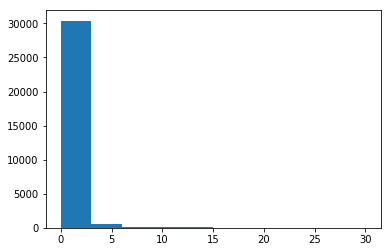

In [127]:
plt.hist( mer.numerical_1, range= [0,30]);

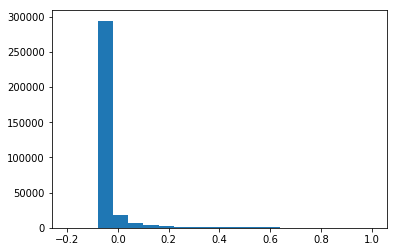

In [132]:
plt.hist( mer.numerical_1, range= [-.2,1], bins= 20);

In [133]:
np.corrcoef( mer.numerical_1, mer.numerical_2)

array([[1.        , 0.99874593],
       [0.99874593, 1.        ]])

In [134]:
np.percentile( mer.numerical_1,95), np.percentile( mer.numerical_1,5)

(0.09124755859375, -0.057464599609375)

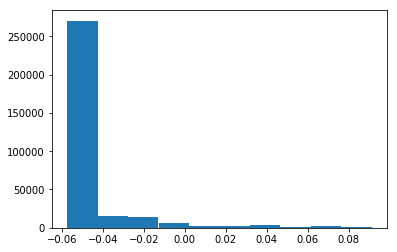

In [147]:
plt.hist( mer.loc[ mer.numerical_1<.1,'numerical_1']);

In [137]:
min_n1 = mer['numerical_1'].min()
_ = sum(mer['numerical_1'] == min_n1) / mer['numerical_1'].shape[0]
print(f'{_ * 100:.4f}% of values in numerical_1 are equal to {min_n1}')

68.3570% of values in numerical_1 are equal to -0.057464599609375


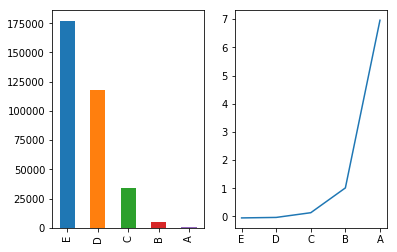

In [144]:
plt.subplot( 1,2,1)
mer.most_recent_sales_range.value_counts().plot('bar');
plt.subplot( 1,2,2)
b= mer.groupby('most_recent_sales_range').numerical_1.mean().sort_index(ascending= False)
plt.plot( ['E','D','C','B','A'], b);

In [145]:
mer.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

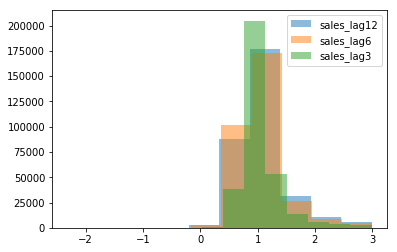

In [153]:
plt.hist( mer.loc[ (mer.avg_sales_lag12>-10) & (mer.avg_sales_lag12<3),
             'avg_sales_lag12'].fillna(0),label='sales_lag12',alpha=.5);
plt.hist( mer.loc[ (mer.avg_sales_lag6>-10) & (mer.avg_sales_lag6<3),
             'avg_sales_lag6'].fillna(0),label='sales_lag6',alpha=.5);
plt.hist( mer.loc[ (mer.avg_sales_lag3>-10) & (mer.avg_sales_lag3<3),
             'avg_sales_lag3'].fillna(0),label='sales_lag3',alpha=.5);
plt.legend();

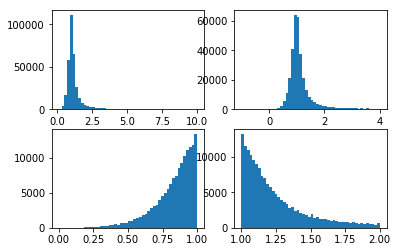

In [170]:
plt.subplot(2,2,1)
plt.hist( mer.loc[ mer.avg_purchases_lag12<10,'avg_purchases_lag12'].fillna(0),bins=50);
plt.subplot(2,2,2)
plt.hist( mer.loc[ mer.avg_purchases_lag6<10,'avg_purchases_lag6']
         .fillna(0), range= [-1,4],bins=50);
plt.subplot(2,2,3)
plt.hist( mer.loc[ mer.avg_purchases_lag12<10,'avg_purchases_lag12'].
         fillna(0), bins= 50, range= [0,1]);
plt.subplot(2,2,4)
plt.hist( mer.loc[ mer.avg_purchases_lag12<10,'avg_purchases_lag12'].
         fillna(0), bins= 50, range= [1,2]);

In [172]:
mer.avg_purchases_lag12.nlargest()

10              inf
11              inf
12              inf
235    5.021556e+04
15     5.236000e+03
Name: avg_purchases_lag12, dtype: float64

In [173]:
mer.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,0,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,0,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,0,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,0,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,1,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,1,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,1,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,1,-1,-1,NaN


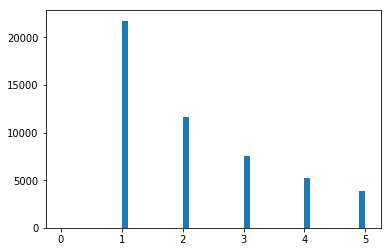

In [186]:
plt.hist( train.feature_1,train.groupby('feature_1').target.value_counts(), range= [0,5],bins= 50);

In [182]:
train.groupby('feature_1').target.max(),train.groupby('feature_1').target.nsmallest()

(feature_1
 1    15.007812
 2    13.593750
 3    15.609375
 4     9.664062
 5    17.968750
 Name: target, dtype: float16, feature_1       
 1          3656    -33.21875
            12357   -33.21875
            13101   -33.21875
            15688   -33.21875
            15807   -33.21875
 2          225     -33.21875
            254     -33.21875
            386     -33.21875
            566     -33.21875
            578     -33.21875
 3          64      -33.21875
            92      -33.21875
            125     -33.21875
            761     -33.21875
            810     -33.21875
 4          151     -33.21875
            467     -33.21875
            515     -33.21875
            1574    -33.21875
            1849    -33.21875
 5          248     -33.21875
            1571    -33.21875
            1601    -33.21875
            1893    -33.21875
            1909    -33.21875
 Name: target, dtype: float16)

In [184]:
train.loc[ train.target>-32,'target'].nsmallest()

46653    -17.609375
5888     -17.500000
161122   -17.437500
8386     -17.187500
169498   -15.835938
Name: target, dtype: float16

In [185]:
train.target= train.target.clip_lower(-18)

In [189]:
train.groupby('feature_3').target.mean()

feature_3
0   -0.201416
1   -0.247192
Name: target, dtype: float16

In [190]:
train.target.max()

17.97

In [198]:
train['target_bin']= pd.cut( train.target, range( -18,19)).mean

In [205]:
train.drop( 'target_bin', axis= 1,inplace= True)

In [200]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,num_his_trans,target_bin
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312,260,"<bound method Series.mean of 0 (-1, 0..."
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822,350,"<bound method Series.mean of 0 (-1, 0..."
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988,43,"<bound method Series.mean of 0 (-1, 0..."
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456,77,"<bound method Series.mean of 0 (-1, 0..."
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790,133,"<bound method Series.mean of 0 (-1, 0..."


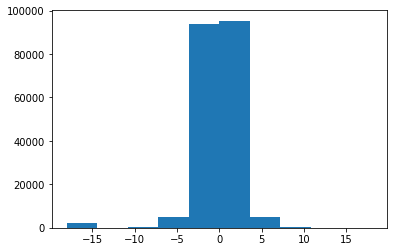

In [203]:
plt.hist(train.target);

In [213]:
train.loc[ :,['feature_1','feature_2','feature_3']].duplicated().sum()

201903

In [212]:
train.loc[ :,['feature_1','feature_2','feature_3']].head()

,feature_1,feature_2,feature_3
0,5,2,1
1,4,1,0
2,2,2,0
3,4,3,0
4,1,3,0


In [224]:
train.loc[ :,['feature_1','feature_2','feature_3']].nunique()

feature_1    5
feature_2    3
feature_3    2
dtype: int64

In [250]:
his[ his.card_id=='C_ID_d639edf6cd'].sort_values( 'purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
20593110,Y,C_ID_d639edf6cd,209,N,0,A,818,M_ID_efd85d1f38,-13,0,2017-01-11 08:21:22,1.0,9,12
20593098,Y,C_ID_d639edf6cd,233,N,0,A,705,M_ID_14275fe7b9,-13,0,2017-01-11 16:30:18,1.0,9,33
20593124,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_5634fd83e0,-13,0,2017-01-13 19:27:23,5.0,5,33
20593105,Y,C_ID_d639edf6cd,19,N,0,A,367,M_ID_ba54afc107,-13,0,2017-01-26 18:42:27,1.0,9,16
20593129,Y,C_ID_d639edf6cd,143,N,0,A,80,M_ID_522bd82b6f,-13,0,2017-01-27 22:14:29,5.0,5,37
20593133,Y,C_ID_d639edf6cd,143,N,0,A,367,M_ID_cea793c22f,-13,0,2017-01-28 16:24:44,5.0,5,16
20593108,Y,C_ID_d639edf6cd,69,N,0,A,511,M_ID_00a6ca8a8a,-12,0,2017-02-15 21:09:05,1.0,9,7
20593114,Y,C_ID_d639edf6cd,143,N,0,A,842,M_ID_68c75b8804,-12,0,2017-02-15 22:34:22,5.0,5,37
20593117,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_17511eed62,-12,0,2017-02-20 13:04:10,5.0,5,33
20593102,Y,C_ID_d639edf6cd,143,N,0,A,705,M_ID_5634fd83e0,-12,0,2017-02-20 19:13:49,5.0,5,33


In [248]:
new[ new.card_id=='C_ID_d639edf6cd']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1939100,Y,C_ID_d639edf6cd,143,N,0,A,528,M_ID_c84d28e906,2,-0.700195,2018-04-28 17:43:11,5.0,5,25


In [228]:
mer[ mer.merchant_id== 'M_ID_ea776a9040']

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
329524,M_ID_ea776a9040,35,19,36,1.74707,1.74707,0,B,B,1.01,0.982868,3,1.54,1.13246,6,1.27,1.019492,12,0,-1,13,4.0


In [229]:
mer.category_4.unique()

array([0, 1])

In [230]:
np.corrcoef( mer.category_1, mer.category_4)

array([[1.        , 0.23094876],
       [0.23094876, 1.        ]])

In [236]:
mer.duplicated('merchant_id').sum()

63

In [233]:
mer[ mer.merchant_id== 'M_ID_645a6af169']

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
47803,M_ID_645a6af169,35926,68,27,-0.057465,-0.057465,0,E,E,1.69,0.791667,3,2.62,1.812500,6,2.30,1.458333,12,0,94,19,3.0
47804,M_ID_645a6af169,19140,87,27,-0.057465,-0.057465,0,E,E,0.89,1.111111,3,1.54,1.555556,6,1.55,2.000000,12,0,29,15,1.0


In [237]:
mer.shape

(334696, 22)

In [242]:
pd.concat( [train.drop('target', axis= 1),test], axis= 0).duplicated('card_id').sum()

0

In [243]:
pd.concat( [train.drop('target', axis= 1),test], axis= 0).shape

(325540, 6)

In [244]:
pd.concat( [his, new], axis= 0).duplicated('card_id').sum()

30749852

In [7]:
his.shape[0]+new.shape[0]-30749852

NameError: name 'his' is not defined